<a href="https://colab.research.google.com/github/Ekaagra08/Twitter-Sentiment-Analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#run just once
! pip install -q kaggle
from google.colab import files 
files.upload() 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          17734  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10593  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5226  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3807  
promptcloud/careerbuilder-job-listing-2020

# Importing Dependencies

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Loading dataset and pre-processing of data


from google.colab import files
files.upload()
!kaggle datasets download -d kazanova/sentiment140

In [2]:
!kaggle datasets download -d kazanova/sentiment140

 94% 76.0M/80.9M [00:00<00:00, 94.6MB/s]
100% 80.9M/80.9M [00:00<00:00, 118MB/s] 


In [4]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [13]:
cols = ['target','id','date','flag','user','text']
df= pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=cols)
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
s_df = df[['target','text']]
s_df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [18]:
print("shape: ",s_df.shape)
s_df.isna().sum()
#No null values


shape:  (1600000, 2)


target    0
text      0
dtype: int64

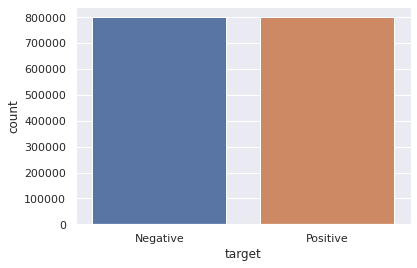

In [21]:
sns.set_theme(style="darkgrid")
sns.countplot(data=s_df,x='target')
plt.xticks(ticks=[0,1],labels=['Negative','Positive'])
plt.show()

## Text Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(s_df.text,s_df.target,test_size=0.2,random_state=42)

In [23]:
X_train

1374558    @jbtaylor WIth ya. &quot;I'd like a Palm Pre, ...
1389115    felt the earthquake this afternoon, it seems t...
1137831          Ruffles on shirts are like so in, me Likey 
790714     Pretty bad night into a crappy morning....FML!...
1117911               @dcbriccetti yeah, what a clear view! 
                                 ...                        
259178     this song's middle change just doesn't want to...
1414414                 @officialnjonas Good luck with that 
131932              @ProudGamerTweet I rather average 32370 
671155     Pickin up @misstinayao waitin on @sadittysash ...
121958     @ home studying for maths wooot ! im so going ...
Name: text, Length: 1280000, dtype: object

In [24]:
# dictionary containing all emojis.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused',
          '$_$': 'greedy','@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
          ":'-)": 'sadsmile',';)': 'wink',';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
# list containing all stopwords.
stopword =  ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves']

In [26]:
def preprocess(text , wordLemm):
    processedText = []
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in text:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [27]:
wordLemm = WordNetLemmatizer()
X_train = preprocess(list(X_train),wordLemm)

In [28]:
X_train

['USER with ya quot like palm pre touchstone charger readynow yes that sound good but is my beer ready now prelaunch ',
 'felt the earthquake this afternoon it seems to be but at the epicenter ',
 'ruffle on shirt are like so in me likey ',
 'pretty bad night into crappy morning fml if only buttface didnt say he could go into work today ',
 'USER yeah what clear view ',
 'one more time follow my fam ff USER USER USER USER USER USER welcome to friday follow me ',
 'USER rock thanks will be added to next robcrotch tm video ',
 'USER yes please met your fiancee at ian party the other day btw she very sweet congrats to you guy ',
 'my gawd they ve finished the whole bowl before even posted my previous tweet making 2nd bowl ',
 'USER awesome game but very short you ll finish it and be craving for more god of war action ',
 'happy mother day to all the grown happy amp the lil prego smut lol just playing everyone is loved happy mother day amp god bless ',
 'back from eating dinner ',
 'USER c

# Creation and Training of Model

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2), max_features=1000000,stop_words=stopword)

vect.fit(X_train)

TfidfVectorizer(max_features=1000000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'ain',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'by', 'can', 'd', 'did', 'do',
                            'does', 'doing', 'down', ...])

In [30]:
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

## Create Model

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Train Model

In [33]:
log_clf = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
log_clf.fit(X_train,y_train)

log_pred = log_clf.predict(X_test)
print('Logistic Regression Accuracy :',accuracy_score(y_test,log_pred))

Logistic Regression Accuracy : 0.799584375


# Prediction and Validation

[[127112  32382]
 [ 31751 128755]]


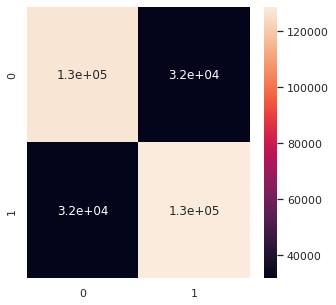

In [34]:
cm = confusion_matrix(y_test,log_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.show()

In [35]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80    159494
           4       0.80      0.80      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



# Saving Model